<div align="center">

This report is presented by:  


Joelle ASSY   
Aya BEN TAGHALINE   
Rayane ADAM  

As part of the NGS course in M1 GENIOMHE 2024-25

  
</div>

In [1]:
setwd('../data/TP_DATA_PROG/')

# I. Study of a monogenic disease: Clouston's disease

## a: Genetic linkage analysis - lodscore method

### a.1. Install the paramlink package and call the library

In [2]:
install.packages('paramlink')
library(paramlink)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


PLEASE NOTE:
Paramlink has been superseded by the `ped suite` packages (https://magnusdv.github.io/pedsuite/).
It is maintained for legacy purposes only, and should not be used in new projects.




### a.2. Read and view the data file

In [3]:
cols<-c('Family_number','Individual_number','Father_number','Mother_number', 'Sex', 'Disease_status','marker1_1','marker1_2','marker2_1','marker2_2','marker3_1','marker3_2','marker4_1','marker4_2','marker5_1','marker5_2','marker6_1','marker6_2','marker7_1','marker7_2','marker8_1','marker8_2','marker9_1','marker9_2','marker10_1','marker10_2','marker11_1','marker11_2','marker12_1','marker12_2','marker13_1','marker13_2')

fam<-read.table('I.a.Paramlink/fam.txt')
colnames(fam)<-cols
# fam[1:5,1:10]
str(fam)

'data.frame':	47 obs. of  32 variables:
 $ Family_number    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Individual_number: int  1 2 21 5 4 3 6 36 26 25 ...
 $ Father_number    : int  0 0 0 1 1 1 0 0 5 5 ...
 $ Mother_number    : int  0 0 0 2 2 2 0 0 21 21 ...
 $ Sex              : int  1 2 2 1 1 1 2 2 1 2 ...
 $ Disease_status   : int  2 1 1 2 1 2 1 1 2 1 ...
 $ marker1_1        : int  0 0 0 9 0 0 0 3 9 1 ...
 $ marker1_2        : int  0 0 0 1 0 0 0 9 2 2 ...
 $ marker2_1        : int  0 0 0 5 0 0 0 6 5 10 ...
 $ marker2_2        : int  0 0 0 10 0 0 0 8 6 6 ...
 $ marker3_1        : int  0 0 0 4 0 0 0 4 4 2 ...
 $ marker3_2        : int  0 0 0 2 0 0 0 4 2 2 ...
 $ marker4_1        : int  0 0 0 2 0 0 0 6 2 3 ...
 $ marker4_2        : int  0 0 0 3 0 0 0 5 3 3 ...
 $ marker5_1        : int  0 0 0 3 0 0 0 1 3 2 ...
 $ marker5_2        : int  0 0 0 2 0 0 0 2 2 2 ...
 $ marker6_1        : int  0 0 0 3 0 0 0 5 3 3 ...
 $ marker6_2        : int  0 0 0 3 0 0 0 2 8 8 ...
 $ marker7_1        : int  0 0 0 1

#### Q1:

genotype of the first marker of the individual of id 5

In [4]:
for (row in 1:nrow(fam)){
  if (fam[row,'Individual_number']==5){
    cat(fam[row,]$marker1_1,fam[row,]$marker1_2)
  }
}

9 1

The genotype of the individual 5 is 9/1

### a.3. Data transformation for linkage analysis and descriptive statistics

In [5]:
x=linkdat(fam)

Family ID: 1.
47 individuals.
22 affected, 25 non-affected.
10 nuclear subfamilies.
13 markers.



#### Q2:


In [ ]:
## count the number of families in family number of fam
fam$Family_number

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[39] 1 1 1 1 1 1 1 1 1

There is 1 family in the dataset

In [7]:
affected_indiv<-c()
unaffected_indiv<-c()

for (i in 1:nrow(fam)){
  if (fam[i,'Disease_status']==1){
    affected_indiv<-c(affected_indiv,fam[i,'Individual_number'])
  } else {
    unaffected_indiv<-c(unaffected_indiv,fam[i,'Individual_number'])
  }
}

paste0('affected indiv:',length(affected_indiv))
paste0('unaffected indiv:',length(unaffected_indiv))

[1] "affected indiv:25"

[1] "unaffected indiv:22"

There is: 

* 25 affected  
* 22 unaffected

13 markers are analyzed

<!-- 
1 family with 10 nuclear subfamilies.  
47 individuals: 22 affected, 25 non-affected.  
13 markers analyzed -->

#### Q3:

In [8]:
x

   ID FID MID SEX AFF  V1   V2  V3  V4  V5
1   1   0   0   1   2 -/-  -/- -/- -/- -/-
2   2   0   0   2   1 -/-  -/- -/- -/- -/-
3  21   0   0   2   1 -/-  -/- -/- -/- -/-
4   5   1   2   1   2 9/1 5/10 4/2 2/3 3/2
5   4   1   2   1   1 -/-  -/- -/- -/- -/-
6   3   1   2   1   2 -/-  -/- -/- -/- -/-
7   6   0   0   2   1 -/-  -/- -/- -/- -/-
8  36   0   0   2   1 3/9  6/8 4/4 6/5 1/2
9  26   5  21   1   2 9/2  5/6 4/2 2/3 3/2
10 25   5  21   2   1 1/2 10/6 2/2 3/3 2/2
11 23   5  21   2   2 9/2  5/5 4/4 2/4 3/3
12 30   0   0   1   1 -/-  -/- -/- -/- -/-
13 22   5  21   2   2 9/2  5/5 4/4 2/4 3/3
14 27   0   0   1   1 1/1  2/9 3/4 3/4 3/3
15 24   5  21   2   2 9/2  5/6 4/2 2/3 3/2
16 32   0   0   1   1 2/2  9/3 4/4 2/5 3/4
17 44  26  36   2   2 9/3  5/6 4/4 2/6 3/1
18 43  26  36   2   2 9/9  5/8 4/4 2/5 3/2
19 42  26  36   2   1 -/-  -/- -/- -/- -/-
20 41  26  36   1   2 9/9  5/8 4/4 2/5 3/2
21 40  26  36   2   1 3/2  6/6 4/2 6/3 1/2
22 39  26  36   1   1 3/2  6/6 4/2 6/3 1/2
23 38  26  

They have taken each marker's 2 columns representing the alleles and transformed them into one column of format `allele1/allele2` $\iff$ representing the genotype. 

#### Q4

In [ ]:
summary(x)

Pedigree:
---------
47 individuals
11 founders, 36 nonfounders; bit size = 61 
10 nuclear subfamilies 
22 affected by disease, 25 unaffected, 0 with unknown affection status

Marker data:
------------
13 markers in total
13 individuals with no available genotypes: 1, 2, 21, 4, 3, 6, 30, 42, 8, 10, 11, 17, 47 
0 % missing alleles (excluding ungenotyped individuals)

Chromosome distribution of markers:
 chromosome unknown: 13 markers

Allele number distribution:
 3 alleles: 1 marker
 4 alleles: 4 markers
 5 alleles: 2 markers
 6 alleles: 2 markers
 7 alleles: 4 markers

Model parameters:
-----------------
No model parameters set


There is: 

* 11 founder individuals  
* 13 with unknown genotypes  
* 4 markers with 7 alleles

### a.4. Family tree drawing for 1st marker

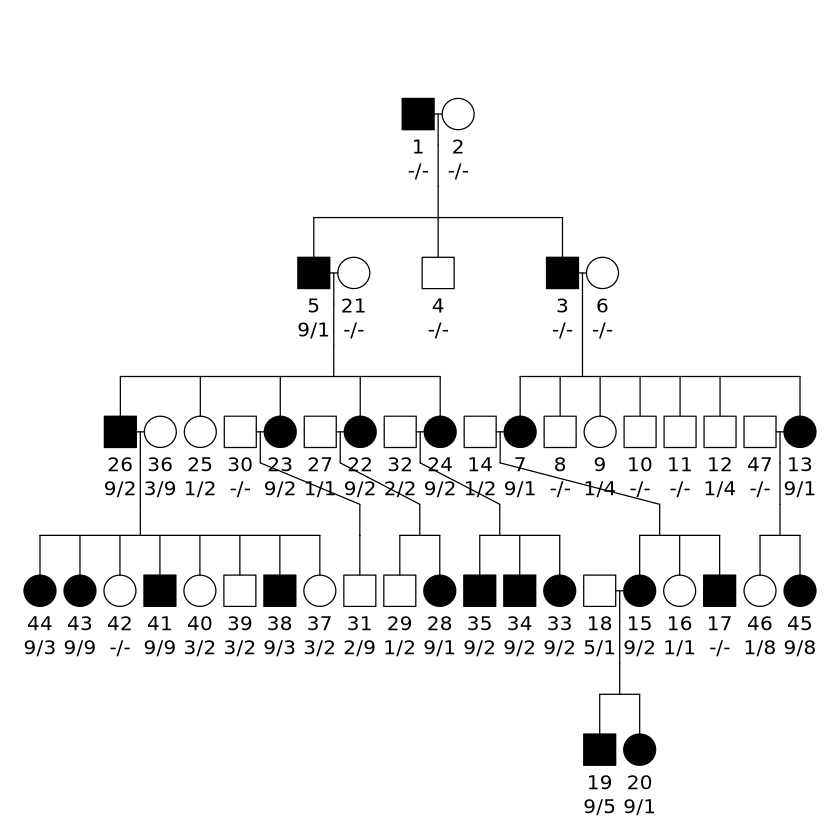

In [ ]:
plot(x, marker=1)

#### Q5:

For indiv 15,16 and 17 repsectively:  

* 9/2  
* 1/1
* missing (-/-)

### a.5. Definition of the genetic model to be considered for linkage analyses

Here `Dd` and `DD` are the at-risk genotypes, since it's autosomal dominant and `d` is the deleterious allele (so dominant allele)

In [9]:
xdom=setModel(x, model=1, penetrances = c(0.00001,1,1), dfreq=0.00001)

Here we have $Phenocopy=P(affected/DD) = 0.00001$  

### a.6. Linkage analyses with lodscore calculation for given theta values

In [10]:
lod_values=lod(xdom, theta=c(0,0.05,0.1,0.15,0.2,0.25,0.3,0.4,0.5))

In [13]:
str(lod_values)

 'linkres' num [1:9, 1:13] 7.67 7.04 6.37 5.66 4.92 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:9] "0" "0.05" "0.1" "0.15" ...
  ..$ : chr [1:13] "M1" "M2" "M3" "M4" ...
 - attr(*, "analysis")= chr "mlink"
 - attr(*, "map")='data.frame':	13 obs. of  3 variables:
  ..$ CHR   : num [1:13] 1 1 1 1 1 1 1 1 1 1 ...
  ..$ MARKER: chr [1:13] "M1" "M2" "M3" "M4" ...
  ..$ POS   : int [1:13] 1 2 3 4 5 6 7 8 9 10 ...


#### Q6

We can the same pattern for markers M1 to M10: max lod score is obtained for theta=0 and its value in each of these markers is higher than 3 -> reject the null hypothesis -> conclusion is this gene is very close to each of these genetic markers. And if the disease gene is close to them all it means that the first 10 markers are in cluster, they are very close. 

For marker 11 and 12 the max lod score is obtained for same theta value = 0.05 and the value is higher than 3 so we can reject the null hypothesis and conclude that the probable location of the disease locus is around 0.05 cM from these markers. 

For the marker 13, there is no theta value for which the lod-score is higher than 3, but for theta=0 the lod-sore = -32 < -2 so the null hypothesis is not rejected, hence we can exclude that the disease gene is close to this marker. 

#### Q7

![excel image](../assets/q7.png)

The recombination rate is between 0 and 0.5 so the confidence interval for the recombination rate will be in this range. Here theta max is 0 because it is for theta = 0 that we have the maximum of the lod score. It means that the lower bound of the confidence interval will be equal to 0 and the intersection is the upper bound. We approximate it. 

Confidence interval for Marker 1 is ranging between $[0, 0.07]$ 

### a.7.  Linkage analyses with determination of maximum lodscore

In [ ]:
lod(xdom, marker=c(5,7,8,12), theta='max')

              M5        M7        M8         M12
LOD:    6.005044  5.714132  5.255074  4.28823977
t_max:  0.000000  0.000000  0.000000  0.04508497

#### Q8

Interpretation of the results:  

For markers $M_5$, $M_7$ and $M_8$, the lod-score of theta max > 3 -> reject the null hypothesis, and $\theta_{max}$ is 0 which means that the markers is very close to the disease gene.  

For marker $M_{12}$, $\theta_{max}$ is 0.045 with a lod score of $4.28\gt3$, which is greater than 3, so we reject the null hypothesis and conclude that the most probable location of the disease gene is around 0.045 cM from this marker.

#### Q9

In [ ]:
## as.matrix(lod_values)
for (i in 1:ncol(lod_values)){
    max_lod=max(lod_values[,i])
    cat('max lod value for marker',i,'is',max_lod,'\n')
}

max lod value for marker 1 is 7.6738 
max lod value for marker 2 is 7.247411 
max lod value for marker 3 is 4.762693 
max lod value for marker 4 is 8.171219 
max lod value for marker 5 is 6.005044 
max lod value for marker 6 is 4.969872 
max lod value for marker 7 is 5.714132 
max lod value for marker 8 is 5.255074 
max lod value for marker 9 is 4.253735 
max lod value for marker 10 is 3.564322 
max lod value for marker 11 is 3.570878 
max lod value for marker 12 is 4.285454 
max lod value for marker 13 is 2.385958 


#### Q10

Markers 1-10 all have the same pattern of lod scores relative to $\theta$ values: The highest lod score is at $\theta_0$ and the lowest at $\theta_{0.5} (=0)$, with lod scores $\gt3$, which means that the markers are at very close proximity to the disease gene.

### a.8. Linkage analyses by modifying marker allele frequencies

In [ ]:
## -- before when they were equifrequent
as.data.frame(lod_values[,"M5"])

,"lod_values[, ""M5""]"
,<dbl>
0,6.0050443
0.05,5.4606032
0.1,4.8898188
0.15,4.2903721
0.2,3.6599709
0.25,2.9968532
0.3,2.3012371
0.4,0.8643605
0.5,0.0000000


In [ ]:
## -- after modifying allele frequencies
xdom5=modifyMarker(xdom,marker = 5, afreq = c(0.1, 0.1, 0.1, 0.7))
lod(xdom5, marker=5, theta=c(0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5))

                    M5
theta=0:     6.1601384
theta=0.05:  5.6089781
theta=0.1:   5.0311016
theta=0.15:  4.4242603
theta=0.2:   3.7862270
theta=0.25:  3.1152044
theta=0.3:   2.4110015
theta=0.4:   0.9454197
theta=0.5:   0.0000000

#### Q11

Results have been modified slightly in each, overall the same pattern (decreasing when increasing theta values) with only a small increase of lod values of when we changed the frequencies, and then reaching 0 when $\theta=0.5$ 

This slight difference can be attributed to the incorporation of allele frequencies into the calculation due to the presence of founders (individuals without parents) and individuals with missing genotypes in the dataset. For these cases, all possible genotypes must be considered, making the likelihood computation more complex. The probabilities of these genotypes are calculated using the allele frequencies, with Hardy-Weinberg equilibrium applied to estimate the expected genotype frequencies. If the results had been identical, it would suggest the absence of founders with missing genotypes, eliminating the need to account for different genotypes.

### a.9.  Impact of misspecifying the genetic model

In [ ]:
xrec=setModel(x, model=2, penetrances=c(0.00001,0.00001, 1), dfreq=0.00001)
lod(xrec)

                 M1         M2         M3         M4         M5         M6
theta=0:  -11.52737  -20.34523  0.8394887  -20.80169  -11.46918  -16.24291
                 M7         M8        M9        M10        M11        M12
theta=0:  -6.483199  -3.089972  1.408298  -14.51178  -16.13149  -8.403986
                M13
theta=0:  -3.274896

#### Q12

Markers $M_1, M_2, M_4, M_5, M_6, M_7, M_8, M_{10}, M_{11}, M_{12}, M_{13}$  have a negative value $\lt-2$ for $\theta_{max}$, which means that the markers are far from the disease gene.

Except for $M_3$ and $M_9$ which have a positive value however ranging between $-2\lt lodscore\lt3$ hence nothing can be concluded

In this section we have changed the mode of inheritance from autosomal dominant to autosomal recessive, we can clearly see the differences in the results as in here we haven't concluded any marker that is in close proximity to the desiease gene, this is because the mode of inheritance changes the at risk genotypes which in return affect the calculation of the lod score

This is the imortance of the disease model's influence, it's crucial to be near the true model.

_The lod score is parametric because it's affected by genetic mode of the diseaese and the alellic frequencies_

## b: Familial association analysis - TDT

In [18]:
%./fbat.exe




```text
*******************************************************
*                                                     *
*     *********  * * *          *       *********     *
*     *          *     *       * *          *         *
*     *******    *  * *       *   *         *         *
*     *          *     *     * *** *        *         *
*     *          *     *    *       *       *         *
*     *          * * *     *         *      *         *
*                                                     *
*          Xin Xu  C1999-2009       v2.0.4(beta1)      *
*          Program for Population Genetics            *
*          Harvard School of Public Health            *
*                                                     *
*******************************************************
```

```text
>> log resfbat
logging to file "resfbat" is on
>> load fbat.ped
read in: 6 markers from 651 pedigrees (652 nuclear families,2011 persons)
```


#### Q13

There are:  

* 652 nuclear families
* 2011 persons i.e. $\frac{2011}{652} \approx 3$ individuals per family  
* 6 markers

```text
>> fbat
trait affection; offset 0.000; model additive; test bi-allelic; minsize 10; min_freq 0.000; p 1.000; maxcmh 1000

Marker  Allele   afreq   fam#     S-E(S)      Var(S)       Z           P
------------------------------------------------------------------------
SNP2    1        0.636    409      3.500     138.750   0.297    0.766365
SNP2    2        0.364    409     -3.500     138.750  -0.297    0.766365
SNP3    1        0.370    402      2.000     140.500   0.169    0.866009
SNP3    2        0.630    402     -2.000     140.500  -0.169    0.866009
SNP4    1        0.403    425      5.000     148.500   0.410    0.681582
SNP4    2        0.597    425     -5.000     148.500  -0.410    0.681582
SNP5    1        0.626    393     -4.500     136.750  -0.385    0.700377
SNP5    2        0.374    393      4.500     136.750   0.385    0.700377
SNP6    1        0.212    283    -52.000      91.000  -5.451   5.01e-008
SNP6    2        0.788    283     52.000      91.000   5.451   5.01e-008
```

#### Q14

An informative family is a family where there exists at least one parent that is heterozygous. 

5 SNPs are present in the results, i.e., they have at least 10 informative families (lowest one is 283). But SNP 1 is not present because it must have had less than 10 informative families which is an insufficient number.

#### Q15

![r2 ensembl](../assets/q15.png)

#### Q16

According to the results coming from `fbat`, SNP6 is in association with the disease, it's actually the only one in the table with a p-value less tahn 0.05, thus there is a significant association. It's either that SNP6 is the causal variant or is in linkage disequilibrium with the causal variant. 
Allele 2 is the at-risk allele that is more transmited from a heterozygous parent to a diseasee child, since the $S-E(S)\gt0$ 

From Ensembl plot, $r^2$ is below threshold for all nearby markers, meaning that none of the markers are in linkage disequilibrium with the SNP of interest (SNP6) `rs76179836`, so we can conclude that it is the causal variant

# II. Study of a multifactorial disease: rheumatoid arthritis

## a. Genetic linkage analysis–affected sib-pairs method

In [ ]:
%./pedstats.exe -d fam.dat -p fam.ped --ignoreMendelianErrors > stats_fam_MK

#### Q17

This generates output files, one of which is called stats_fam_MK (as we have named it by redirecting the output to a file called stats_fam_MK) which contains the results of the analysis. In it we can `cat stats_fam_MK` to see the results, we find the following:

* number of families analyzed: 88
* number of generations per family: 2 (100% of them are actually nuclear families)
* average number of individuals per family: 6.5
* total number of individuals: 572
* total number of affected individuals: 453
* number of genetic markers studied: 1089
* the highest and lowest heterozygosity rates for the markers studied: 
    * highest: a348wh1/(AC)n marker with 99.6% 
    * lowest: 112yb4/(AC)n with 14.7%

In [ ]:
%./merlin.exe -d fam.dat -p fam.ped -m fam.map --pairs --pdf > res_non_param

#### Q18

The non-parametric genetic linkage analysis that has been (NPL method) that has been performed is an equivalent of the lod-score and most importantly, share the same threshold for rejective the null hypothesis (i.e., when it's above 3, we reject the null hypothesis that states that there is no linkage)

Hence, from the maps that we have gotten (23 maps for 23 chromosomes), we can state that there is linkage at spots where the estimated LOD score is above 3.

* number of regions linked to RA (LOD score > 3): 2
    * chromosome X 150cM 
    * chromosome X 175cM

    None of the first 22 chromosomes actually reaches a LOD score of 3, but the last one does, with the positions at 150cM and ~175cM. It means that the disease gene is close to these markers, forming a particular M shape. Since the spot where the disease gene is usually non conclusive, this can explain why the LOD score is low in between these 2 peaks, hence the M shape. This means that the disease gene might between 150 and 175 cM (aroung 160cM) on the X chromosome (in the plot named 999 but as valiated from the .map file, it's the X chromosome)

    ![LOD score chromsome X](../assets/chrX.png)

* number of regions suggestive of RA: 1 (LOD score > 2.5 and < 3)
    * chromosome 6 55cM  

    ![chr6 region](../assets/chr6.png)

    This might suggest that the disease gene is close to this marker in teh short arm of chromosome 6, around 55cM

## b. Genome-wide association analysis

In [1]:
%cd ../data/TP_DATA_PROG/II.a.Plink

/mnt/g/my_stuff/masters/saclay/courses/M1/NGS/part_2/data/TP_DATA_PROG/II.a.Plink


### b.1. A few quality controlsteps

#### Q19

The QC to consider:  

* missing SNP, call rate greater than 95%  
* missing individuals, call rate greater than 95% 
* minor allele frequency greater than 5% 
* Hardy-Weinberg equilibrium p-value greater than 0.001 
* homogeneity of the population (PCA)

First we shall start by removing missing data, i.e. individuals (rows) missing more than 5% as well as SNPs (cols) missing more than 5% (call rate for both is greater than 95%)

For individuals:

In [ ]:
%./plink.exe --file hapmap --mind 0.05 --make-bed --out Ind

```text
PLINK v1.90b5 32-bit (14 Nov 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to Ind.log.
Options in effect:
  --file hapmap
  --make-bed
  --mind 0.05
  --out Ind

8025 MB RAM detected; reserving 2047 MB for main workspace.
Allocated 1535 MB successfully, after larger attempt(s) failed.
.ped scan complete (for binary autoconversion).
Performing single-pass .bed write (50971 variants, 89 people).
--file: Ind-temporary.bed + Ind-temporary.bim + Ind-temporary.fam written.
50971 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.994134.
50971 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are controls.
--make-bed to Ind.bed + Ind.bim + Ind.fam ... done.
```

Starting with 89 individuals (44 cases and 45 controls), we have removed 0 individuals with missing data, so we have maintained all individuals during this quality check step.

Next SNP:

In [4]:
%./plink.exe --bfile Ind --geno 0.05 --make-bed --out IndMk

```text
PLINK v1.90b5 32-bit (14 Nov 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to IndMk.log.
Options in effect:
  --bfile Ind
  --geno 0.05
  --make-bed
  --out IndMk

8025 MB RAM detected; reserving 2047 MB for main workspace.
Allocated 1535 MB successfully, after larger attempt(s) failed.
50971 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.994134.
1509 variants removed due to missing genotype data (--geno).
49462 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are controls.
--make-bed to IndMk.bed + IndMk.bim + IndMk.fam ... done.
```

Starting from 50971 SNPs, we have removed 1509 SNPs with missing data, so we have maintained 49462 SNPs during this quality check step.  

* raw data: `50971` variants  
* variants that didnt pass SNP QC call rate $\gt 95%$: `1509`  
* variants that passed SNP QC: `49462`

Next is filtration based on Minor Allel Frequency (MAF) lower than 5% as SNPs should be common enough to associate a causal variant with a disease (susceptibility genes are frequent)

In [5]:
%./plink.exe --bfile IndMK --maf 0.05 --make-bed --out IndMkMAF

```text
PLINK v1.90b5 32-bit (14 Nov 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to IndMkMAF.log.
Options in effect:
  --bfile IndMK
  --maf 0.05
  --make-bed
  --out IndMkMAF

8025 MB RAM detected; reserving 2047 MB for main workspace.
Allocated 1535 MB successfully, after larger attempt(s) failed.
49462 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.996817.
14169 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--max-mac).
35293 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are controls.
--make-bed to IndMkMAF.bed + IndMkMAF.bim + IndMkMAF.fam ... done.
```

From the previously filtered set of 49462 SNPs, we have removed 14169 SNPs with MAF lower than 5%, so we have maintained 35293 SNPs during this quality check step.

* starting data: `49462` variants 
* variants that didnt pass MAF $\gt 5%$: `14169` 
* variants that passed MAF QC: `35293`

Next is Hardy-Weinberg equilibrium (HWE), the hypothesis here is that frequency of alleles is the expected frequency in a population, so conducting a $\chi^2$ test for conformity is testing for the null hypothesis that the observed genotype frequencies are in HWE

$$H_0 (HWE): p^2 + 2pq + q^2 = 1 $$


In [6]:
%./plink.exe --bfile IndMKMAF --hwe 0.05 --hardy --make-bed --out IndMkMAFHWE

```text
PLINK v1.90b5 32-bit (14 Nov 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to IndMkMAFHWE.log.
Options in effect:
  --bfile IndMKMAF
  --hardy
  --hwe 0.05
  --make-bed
  --out IndMkMAFHWE

8025 MB RAM detected; reserving 2047 MB for main workspace.
Allocated 1535 MB successfully, after larger attempt(s) failed.
35293 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.996644.
--hardy: Writing Hardy-Weinberg report (founders only) to IndMkMAFHWE.hwe ...
done.
--hwe: 945 variants removed due to Hardy-Weinberg exact test.
34348 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are controls.
--make-bed to IndMkMAFHWE.bed + IndMkMAFHWE.bim + IndMkMAFHWE.fam ... done.
```

In here, we start with 35293 SNPs, and we have removed 945 SNPs that did not pass the HWE test, so we have 34348 SNPs that passes this filter.

* starting data: `35293` variants  
* variants that didnt pass HWE, with a p-value of 0.05: `945` (removed those with p-value $\lt 0.05$, since rejecting HWE null hypothesis)  
* variants that passed HWE QC: `34348`


Overall this is a summary of the QC steps and stats:  

| QC step | Starting data | Removed | Passed | Final data |
|---------|---------------|---------|--------|------------|
| Individuals, call rate $\gt95%$ | 89 | 0 | 0 | 89 indiv | 
| SNPs, call rate $\gt95%$ | 50971 | 1509 | 49462 | 49462 variants |
| SNPs, MAF $\gt5%$ | 49462 | 14169 | 35293 | 35293 variants | 
| SNPs, HWE p-value $\gt0.05$ | 35293 | 945 | 34348 | 34348 variants |

End filtered data:  

* 89 individuals (rows)
* 34348 SNPs (columns)


#### b.2. Allelic and genotypic association tests

In [7]:
%./plink.exe -bfile IndMkMAFHWE --assoc --ci .095 --out res_allelic

```text
PLINK v1.90b5 32-bit (14 Nov 2017)             www.cog-genomics.org/plink/1.9/
(C) 2005-2017 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to res_allelic.log.
Options in effect:
  --assoc
  --bfile IndMkMAFHWE
  --ci .095
  --out res_allelic

8025 MB RAM detected; reserving 2047 MB for main workspace.
Allocated 1535 MB successfully, after larger attempt(s) failed.
34348 variants loaded from .bim file.
89 people (89 males, 0 females) loaded from .fam.
89 phenotype values loaded from .fam.
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 89 founders and 0 nonfounders present.
Calculating allele frequencies... done.
Total genotyping rate is 0.996651.
34348 variants and 89 people pass filters and QC.
Among remaining phenotypes, 44 are cases and 45 are controls.
Writing C/C --assoc report to res_allelic.assoc ... done.
```

This generates the results in a table form in one file `res_allelic.assoc`.

#### Q.20

Since we have 34348 variants, we consequently have 34348 statistical tests to conduct ($\chi^2$ tests for association). Thus it is cruical to account for the multiple testing problem, and this is done by adjusting the p-values. 
The bonferroni technique is a Family-Wise Error Rate (FWER) correction method, it is very conservative and it is calculated by dividing the significance level by the number of tests. Here we take the significance level $\alpha=0.05$ and divide it by the number of tests $34348$ to get the new significance level $$\alpha_{new} = \frac{0.05}{34348} \approx 1.45\times10^{-6}$$

Alternatively, the p-value is adjusted and the corrected value to test for significance becomes $1.45\times10^{-6}$

So this is to answer the question, that's the p-value considered to reject the null hypothesis for the allelic association test with Bonferroni correction.

In fact, instead of comparing with it manually we can get the corrected p-values from the software and compare directly with the significance level 5%.

In order to perform correction in PLINK, we need to run the latter command with an `--adjust` flag

```bash
plink --assoc --bfile IndMkMAFHWE --ci .095 --out res_allelic --adjust
```

This will generate a new file `res_allelic.assoc.adjusted` with the adjusted p-values from various MTC methods, and this is a sample of the output:

| CHR | SNP        | UNADJ     | GC        | BONF   | HOLM   | SIDAK_SS | SIDAK_SD | FDR_BH | FDR_BY |
|-----|------------|-----------|-----------|--------|--------|----------|----------|--------|--------|
| 2   | rs2222162  | 5.918e-06 | 3.082e-05 | 0.2033 | 0.2033 | 0.184    | 0.184    | 0.05829 | 0.6424 |
| 9   | rs10810856 | 7.723e-06 | 3.867e-05 | 0.2653 | 0.2653 | 0.233    | 0.233    | 0.05829 | 0.6424 |
| 2   | rs4675607  | 8.05e-06  | 4.007e-05 | 0.2765 | 0.2765 | 0.2416   | 0.2416   | 0.05829 | 0.6424 |
| 2   | rs4673349  | 8.485e-06 | 4.191e-05 | 0.2915 | 0.2914 | 0.2528   | 0.2528   | 0.05829 | 0.6424 |

We want to see results before and after Bonferroni correction.
What we care for is the 3rd column `UNADJ` (no correction applied) and the 5th column `BONF`: this corrected p-value can be directly compared to 0.05 to determine significance.

To test, we will use the awk command to compare the column to the significance level



Those with p-value less than 0.05 are considered significant, before correction:

```bash
$ awk '{if ($3>0.05) print $5}' res_allelic.assoc.adjusted | tail -
n +2 | wc -l
2289
```

(what this command does: it prints the 3rd col which is the unadjusted p-value from the adjusted result file, then filters those that are less than 0.05, removes header then counts them)


after Bonferroni correction:

```bash
$ awk '{if ($5<=0.05) print $5}' res_allelic.assoc.adjusted | tail -n +2 | wc -l
0
```

(what this command does: it prints the 5th col which is the bonferroni corrected p-value from the adjusted result file, then filters those that are less than 0.05, removes header then counts them)

As we can see, none of the SNPs are significant after Bonferroni correction, which is expected since the corrected p-value is very very low (a very conservative correction method).  
On the opposite, before correction, 2289 tests were rejected without applying any correction, i.e. 2289 SNPs were considered significant without accounting for multiple testing.

___Reflection___: 2289 variants were thought to be causal susceptibility genes for RA, but after correction, none of them were significant. This shows the large number of false positives that can be generated when not accounting for multiple testing. And it shows as well how conservative the Bonferroni correction is.

#### Q21

In [12]:
%./plink.exe -bfile IndMkMAFHWE --logistic --ci .095 --out res_gen

In here the p-value is coming from logistic regression, from Wlad test for the coefficients $\beta$ of the genotypes.

This time we will won't use the `--adjust` flag, and we will use the corrected significance level for Bonferroni to compare with the one p-value obtained in results file `res_geno.assoc`. P-value is in column 12.


Before correction, on significance level 0.05:
```bash
awk  '{if ($12<0.05) print $12}' res_geno.assoc.logistic | tail -
n +2 | wc -l
2032
```

After bonferroni on $\alpha_{bonf} = 1.45\times10^{-6}$:

```bash
awk  '{if ($12<1.45e-6) print $12}' res_geno.assoc.logistic | tail -n +2 | wc -l
0
```

#### Q22

We can notice similar result.

In terms of corresction both the allelic and genotypic association tests are similar, the number of significant SNPs is reduced to 0 after Bonferroni correction, which is expected since the corrected p-value is very low.

In terms on unadjusted values, in allelic association test, 2289 SNPs were significant, while in genotypic association test, 2032 SNPs were significant, which is a bit less than the allelic association test and relatively very close. 

This difference can be due to the fact:  

* We're performing $\chi^2$ test in allelic association test, while we're performing logistic regression in genotypic association test, and both tests are different in terms of the hypothesis they test hence might have different results.  
* In genotypic test, we evaluate the association between different genotypes (e.g., AA, AG, GG) and the disease, allowing it to detect specific genotypes that are at risk. In contrast, an allelic test examines the association of individual alleles (e.g., A or G) with the trait and may not detect the same level of association as the genotypic test.  


#### Q23

***It's very important to note that the most important quality step is to test for the homogeneity of SNP data, this is done by PCA and should prove that case and controls are from the same population, and it's not mentioned here***

This is crucial because if the cases and controls are from different populations, the results will be biased and the association tests will be invalid.

To analyze **CHB and JPT together** (chinese and japenese populations) we have to make sure that both populations are in fact homogeneous, which is not carried in our quality control steps. For this purpose, having 2 populations in the same analysis wouldn't be recommended as they are different genetically, they are very likely to be different in terms of their neutral SNPs and this will lead to biased results.